In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Chargement des données 

In [20]:
X = pd.read_csv("../Data/X.csv")
y = pd.read_csv("../Data/y.csv")


### Séparation Train / Test


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



### Vérification des dimensions


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 43), (294, 43), (1176, 1), (294, 1))

## Dummy regressor

### 1. Initialisation

In [23]:
dummy = DummyClassifier(strategy='most_frequent')



### 2. Entraînement


In [24]:
dummy.fit(X_train, y_train)


,strategy,'most_frequent'
,random_state,None
,constant,None



### 3. Prédiction


In [25]:
y_pred_dummy_test = dummy.predict(X_test)
y_pred_dummy_train = dummy.predict(X_train)



### 4. Évaluation


In [26]:
print("--- DUMMY MODEL (TEST) ---")
print(classification_report(y_test, y_pred_dummy_test, zero_division=0))

print("--- DUMMY MODEL (TRAIN) ---")
print(classification_report(y_train, y_pred_dummy_train, zero_division=0))

--- DUMMY MODEL (TEST) ---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

--- DUMMY MODEL (TRAIN) ---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176



### Calcul de la matrice


In [ ]:
cm = confusion_matrix(y_test, y_pred_dummy_test)

### Affichage graphique


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion - Dummy Model')
plt.show()

## Régression Logistique linéaire

### 1. Initialisation


In [29]:

log_reg = LogisticRegression(random_state=42, max_iter=1000)



### 2. Entraînement


In [31]:
log_reg.fit(X_train, y_train)


c:\Users\ethan\Documents\OpenClassrooms\Classifiez_automatiquement_des_informations\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ethan\Documents\OpenClassrooms\Classifiez_automatiquement_des_informations\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'



### 3. Prédictions


In [33]:
y_pred_lr_test = log_reg.predict(X_test)
y_pred_lr_train = log_reg.predict(X_train)



### 4. Évaluation


In [35]:
print("--- LOGISTIC REGRESSION (TEST) ---")
print(classification_report(y_test, y_pred_lr_test, zero_division=0))

print("--- LOGISTIC REGRESSION (TRAIN) ---")
print(classification_report(y_train, y_pred_lr_train, zero_division=0))


--- LOGISTIC REGRESSION (TEST) ---
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.83      0.32      0.46        47

    accuracy                           0.88       294
   macro avg       0.86      0.65      0.70       294
weighted avg       0.88      0.88      0.86       294

--- LOGISTIC REGRESSION (TRAIN) ---
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       986
           1       0.84      0.40      0.54       190

    accuracy                           0.89      1176
   macro avg       0.87      0.69      0.74      1176
weighted avg       0.89      0.89      0.87      1176




### Visualisation de la Matrice de Confusion (Test)


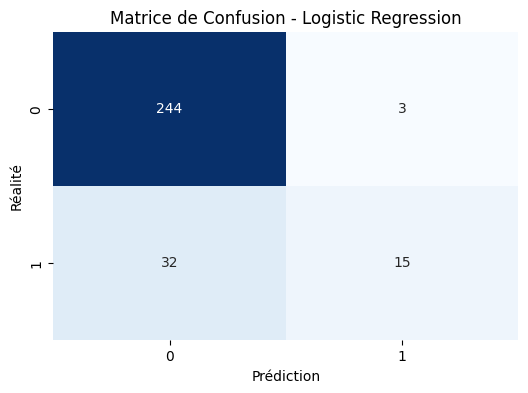

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - Logistic Regression')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()

## Random Forest

### 1. Initialisation


In [39]:

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)



### 2. Entraînement


In [41]:

rf_model.fit(X_train, y_train.values.ravel())


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



### 3. Prédictions


In [43]:
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)



### 4. Évaluation


In [45]:
print("--- RANDOM FOREST (TEST) ---")
print(classification_report(y_test, y_pred_rf_test, zero_division=0))

print("--- RANDOM FOREST (TRAIN) ---")
print(classification_report(y_train, y_pred_rf_train, zero_division=0))


--- RANDOM FOREST (TEST) ---
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.33      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.59      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294

--- RANDOM FOREST (TRAIN) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176




### Matrice de Confusion


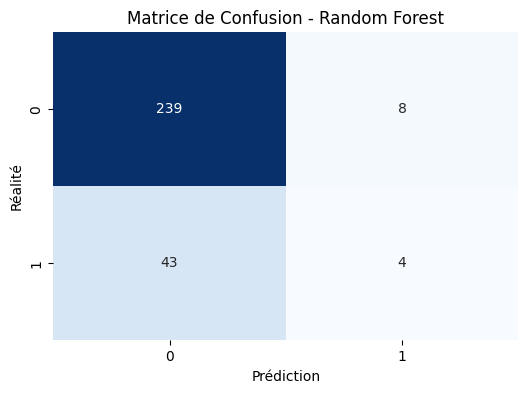

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()